# Keeping the analysis code (with deep learning) compact, by using utility functions from a module
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536
---
This notebook just demonstrates, how compact an analysis task with deep learning (DL) can be succinct and easy to understand while using utility functions written elsewhere. This shows the power of abstraction i.e. the actual DL model related code resides in a module while we only build the cases that we are interested in, call those utility functions, and generate plots to make decision about the model architecture.

### We have stored the utility functions in a script called `DL_utils.py` inside a directory called `utils`

In [1]:
import tensorflow as tf
from utils.DL_utils import myCallback, build_model, compile_train_model, plot_loss_acc

### Build the cases we want to investigate (various accuracy targets and number of neurons)

In [2]:
from itertools import product

accuracy_desired = [0.85,0.9,0.95]
num_neurons = [16,32,64,128]

cases = list(product(accuracy_desired,num_neurons))

print("So, the cases we are considering are as follows...\n")
for i,c in enumerate(cases):
  print("Accuracy target {}, number of neurons: {}".format(c[0],c[1]))
  if (i+1)%4==0 and (i+1)!=len(cases):
    print("-"*50)

So, the cases we are considering are as follows...

Accuracy target 0.85, number of neurons: 16
Accuracy target 0.85, number of neurons: 32
Accuracy target 0.85, number of neurons: 64
Accuracy target 0.85, number of neurons: 128
--------------------------------------------------
Accuracy target 0.9, number of neurons: 16
Accuracy target 0.9, number of neurons: 32
Accuracy target 0.9, number of neurons: 64
Accuracy target 0.9, number of neurons: 128
--------------------------------------------------
Accuracy target 0.95, number of neurons: 16
Accuracy target 0.95, number of neurons: 32
Accuracy target 0.95, number of neurons: 64
Accuracy target 0.95, number of neurons: 128


### Load and pre-process the data - fashion MNIST

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Run the cases using the utility functions and generate plots

W0705 20:22:40.393892 15536 deprecation.py:506] From c:\users\tirtha\python\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


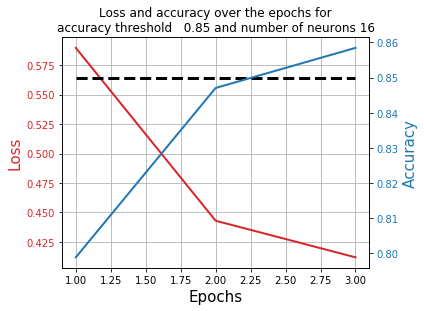

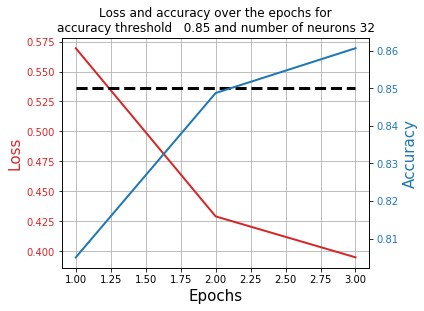

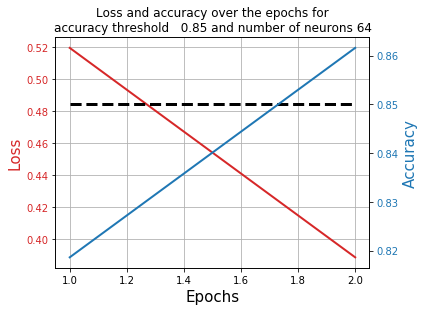

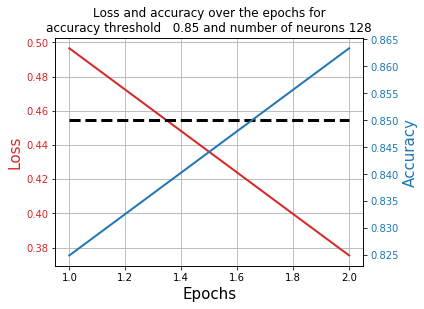

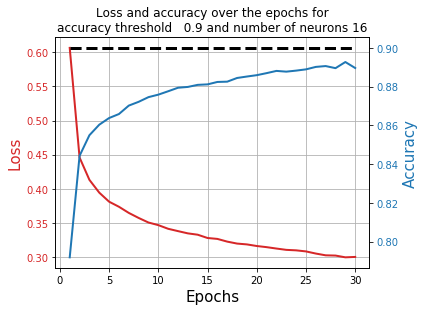

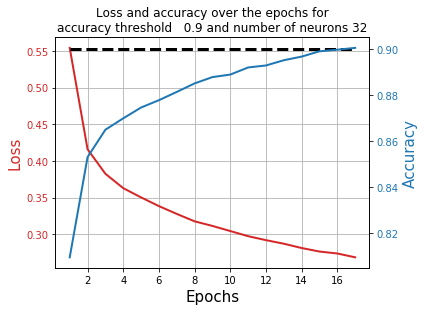

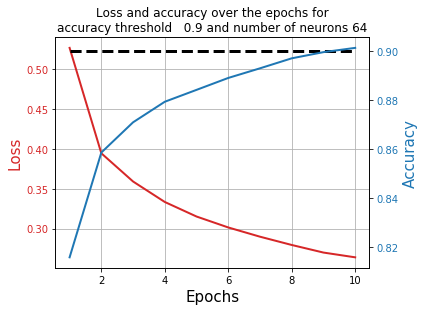

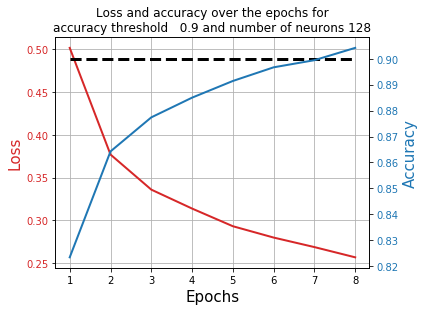

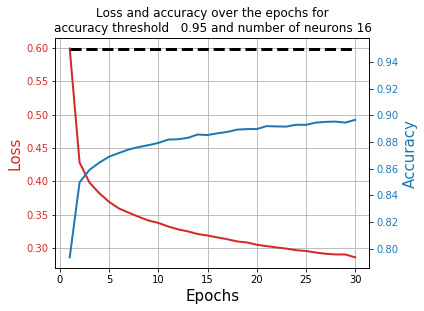

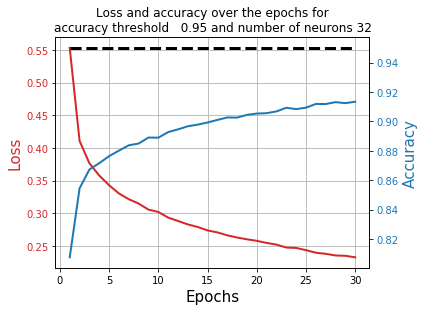

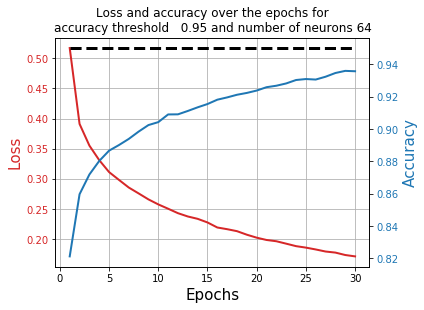

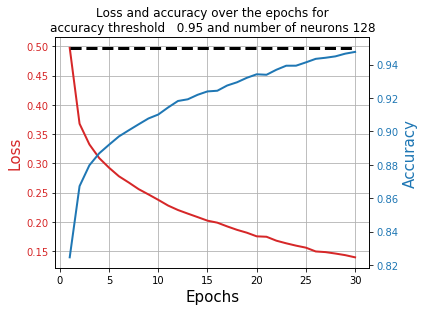

In [5]:
for c in cases:
  # Create a mycallback class with the specific accuracy target 
  callbacks = myCallback(c[0], print_msg=False)
  
  # Build a model with a specific number of neurons
  model = build_model(num_layers=1,architecture=[c[1]])
  
  # Compile and train the model passing on the callback class,choose suitable batch size and a max epoch limit
  model = compile_train_model(model, x_train,y_train,callbacks=callbacks,
                              batch_size=32,epochs=30)
  
  # Construct a suitable title string for displaying the results properly
  title = "Loss and accuracy over the epochs for\naccuracy threshold \
  {} and number of neurons {}".format(c[0],c[1])
  
  # Use the plotting utility function, pass on the accuracy target, 
  # trained model, and the custom title string
  plot_loss_acc(model,target_acc=c[0],title=title)